<a href="https://colab.research.google.com/github/SidiMohamedAJ/Machine_learning-and-Deep_learning-Projects/blob/main/pageRank_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### **Create grahp object**

In [ ]:
G = nx.DiGraph() # Création d'un graphe orienté

## **Draw the graph**

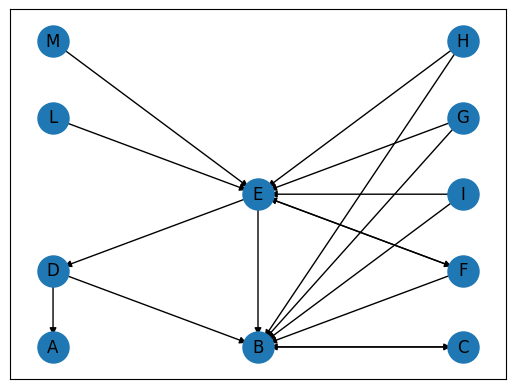

In [ ]:
# Define nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M']

# Add nodes to the graph
G.add_nodes_from(nodes)

# Define edges
edges = [
    ('B', 'C'),
    ('C', 'B'),
    ('D', 'A'),
    ('D', 'B'),
    ('E', 'B'),
    ('E', 'D'),
    ('E', 'F'),
    ('F', 'B'),
    ('F', 'E'),
    ('G', 'B'),
    ('G', 'E'),
    ('H', 'B'),
    ('H', 'E'),
    ('I', 'B'),
    ('I', 'E'),
    ('L', 'E'),
    ('M', 'E')
]

# Add edges to the graph
G.add_edges_from(edges)

# Define the layout with increased distance between nodes
pos = nx.spring_layout(G, k=0.5) # Adjust the value of k as needed

# Manually adjust node positions to separate them
pos['A'] = (0, 0)
pos['B'] = (1, 0)
pos['C'] = (2, 0)
pos['D'] = (0, 1)
pos['E'] = (1, 2)
pos['F'] = (2, 1)
pos['G'] = (2, 3)
pos['H'] = (2, 4)
pos['I'] = (2, 2)
pos['L'] = (0, 3)
pos['M'] = (0, 4)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='black')

# Draw labels for nodes
labels = {node: node for node in nodes}
nx.draw_networkx_labels(G, pos, labels)

# Show the graph
#plt.axis('off')  # Turn off axis labels
plt.show()


## **Calculate the pagerank**

In [ ]:
pagerank = nx.pagerank(G)
pagerank

{'A': 0.03278149315934399,
 'B': 0.38439863456604384,
 'C': 0.3429125997558898,
 'D': 0.039087092099966095,
 'E': 0.08088569323449774,
 'F': 0.039087092099966095,
 'G': 0.016169479016858404,
 'H': 0.016169479016858404,
 'I': 0.016169479016858404,
 'L': 0.016169479016858404,
 'M': 0.016169479016858404}

## **PageRunk implementation from scratch**

implement the adjacency matrix from a direct graph

In [ ]:
def adjecency_matrix(nodes,edges):

  # Create an empty adjacency matrix
  num_nodes = len(nodes)
  adjacency_matrix = np.zeros((num_nodes, num_nodes))

  # Populate the adjacency matrix based on the edges
  node_to_index = {node: i for i, node in enumerate(nodes)}

  for source, target in edges:
      source_index = node_to_index[source]
      target_index = node_to_index[target]
      adjacency_matrix[source_index][target_index] = 1

  # Print the adjacency matrix
  return adjacency_matrix


calculate_ PageRank

In [ ]:
import numpy as np

def calculate_pagerank(adjacency_matrix, threshold):
    N = adjacency_matrix.shape[0]

    # Normalize the adjacency matrix to create the probability matrix P
    nbr_of_links = np.sum(adjacency_matrix, axis=1)

    damping_factor = 0.85
    # Multiply each element by the damping factor
    matrix_transportation = adjacency_matrix * damping_factor

    # Divide each row by the corresponding value in the division_array
    for i in range(len(nbr_of_links)):
        divisor = nbr_of_links[i]
        if divisor == 0:
            matrix_transportation[i, :] = matrix_transportation[i, :]
        else :
        	matrix_transportation[i, :] = matrix_transportation[i, :] / divisor

    # Matrix of teleportation

    # Define the damping factor (lambda)
    damping_factor_teleport = 0.15

    # Get the shape of the original matrix
    rows, cols = adjacency_matrix.shape

    # Create a matrix of teleportation
    teleportation_matrix = np.zeros((rows, cols))

    for i in range(len(nbr_of_links)):
        if nbr_of_links[i] > 0:
            teleportation_matrix[i, :] = damping_factor_teleport / N
        else:
            teleportation_matrix[i, :] = 1 / N

        #Probability
    P = matrix_transportation + teleportation_matrix

    # Initialize the PageRank vector with equal probabilities
    pagerank = np.ones(N) / N
    history_pagerank = np.array(pagerank)
    nbr_iter = 0
    #list_pagerank = {
     #   'step {nbr_iter}' : pagerank,
    #}
    while True:
        new_pagerank = pagerank @ P
        nbr_iter = nbr_iter +1

        # Check for convergence using the L1 norm
        if np.linalg.norm(new_pagerank - pagerank,1) <= threshold:
            break

        pagerank = new_pagerank

        #new_item = { f'step {nbr_iter}' : pagerank }
        #list_pagerank.update(new_item)
    return pagerank,nbr_iter

Call function

In [ ]:
# Define the nodes and edges of the directed graph
  # Define nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M']
edges = [
    ('B', 'C'),
    ('C', 'B'),
    ('D', 'A'),
    ('D', 'B'),
    ('E', 'B'),
    ('E', 'D'),
    ('E', 'F'),
    ('F', 'B'),
    ('F', 'E'),
    ('G', 'B'),
    ('G', 'E'),
    ('H', 'B'),
    ('H', 'E'),
    ('I', 'B'),
    ('I', 'E'),
    ('L', 'E'),
    ('M', 'E')
]
threshold = 1e-6
adjacency_matrix = adjecency_matrix(nodes,edges)

pagerank, nbr_iter = calculate_pagerank(np.array(adjacency_matrix) ,threshold)
print("Page Rank vector = ",pagerank)

Page Rank vector =  [0.03278149 0.38440071 0.34291052 0.03908709 0.08088569 0.03908709
 0.01616948 0.01616948 0.01616948 0.01616948 0.01616948]


In [ ]:
print("Nombre d'iteration :",nbr_iter)

Nombre d'iteration : 81


In [ ]:
# Charger Drive dans Colab
from google.colab import drive
# drive.mount va permettre d'utiliser les fichiers sauvegarder dans Drive
# Il faut donner l'autorisation; un lien vous sera afficher.
# Il faut cliquer sur le lien pour récupérer une clés d'autorisation
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Use a xml file

In [ ]:
import xml.etree.ElementTree as ET

def parse_xml_graph(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Extract nodes and edges
    nodes = []
    edges = []

    for node in root.findall("node"):
        node_id = node.get("id")
        nodes.append(node_id)

    for edge in root.findall("edge"):
        source = edge.get("source")
        target = edge.get("target")
        edges.append((source, target))

    return nodes, edges

In [ ]:
# Load the adjacency matrix from the JSON file
xml_file = '/content/drive/MyDrive/Colab Notebooks/TPs Web Mining/graph.xml'
nodes, edges = parse_xml_graph(xml_file)

adjecency_matrix  = adjecency_matrix(nodes, edges)
threshold = 1e-6

pagerank, nbr_iter = calculate_pagerank(np.array(adjacency_matrix) ,threshold)
print("Page Rank vector using xml file = ",pagerank)

Page Rank vector using xml file =  [0.03278149 0.38440071 0.34291052 0.03908709 0.08088569 0.03908709
 0.01616948 0.01616948 0.01616948 0.01616948 0.01616948]


In [ ]:
print("Nombre d'iteration :",nbr_iter)

Nombre d'iteration : 81
